In [1]:
import os
import json
import hoomd
import codecs

import numpy as np

import polychrom_hoomd.log as log
import polychrom_hoomd.build as build
import polychrom_hoomd.forces as forces
import polychrom_hoomd.render as render

from polykit.generators.initial_conformations import grow_cubic

In [2]:
# Generate uniform spherical distribution of 10,000 vertices by Gaussian sampling (https://mathworld.wolfram.com/SpherePointPicking.html)
number_of_vertices = 10000

vertex_positions = np.random.randn(number_of_vertices, 3)
vertex_positions /= np.linalg.norm(vertex_positions, axis=1, keepdims=True)

In [3]:
# Load vertices into HooMD snapshot
snapshot = build.get_simulation_box(box_length=2, pad=0.)

build.set_membrane_vertices(snapshot, vertex_positions)

In [4]:
# Rescale vertex diameters for easier visualization
vertex_rescale_factor = 0.01

snapshot.particles.diameter = np.ones(number_of_vertices) * vertex_rescale_factor

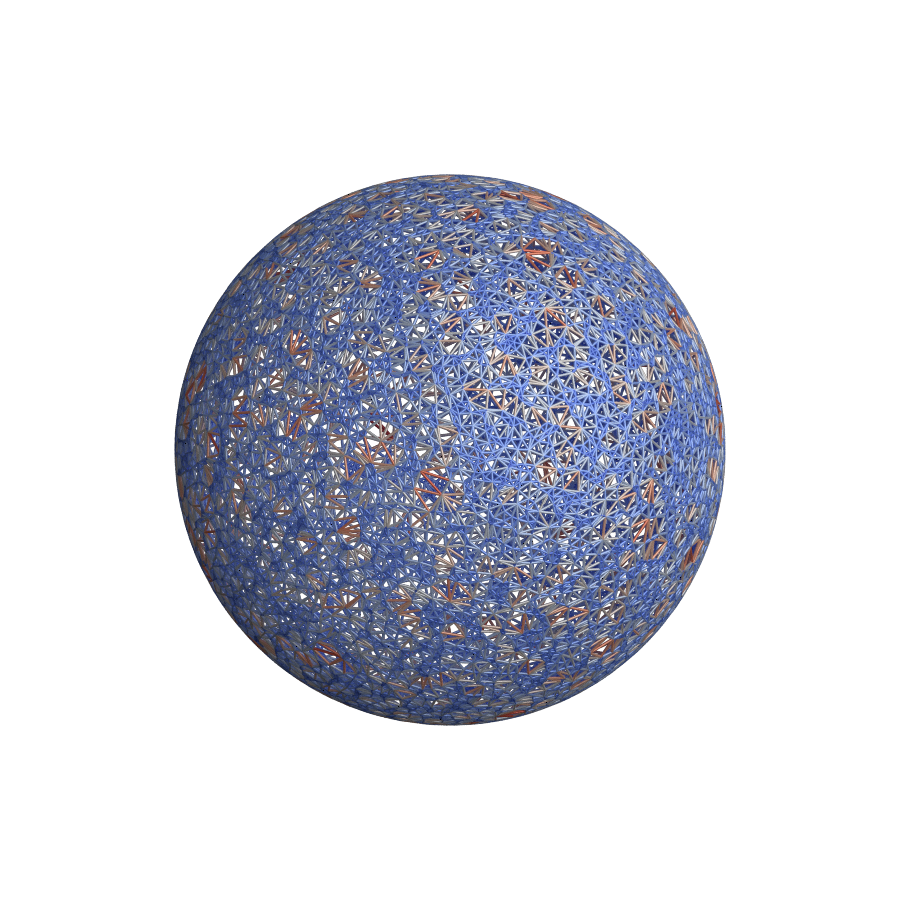

In [5]:
# Visualize the resulting mesh using Fresnel
render.fresnel(snapshot, outline=0, show_strains=True, cmap='coolwarm').static(height=900, width=900)

In [6]:
# This does not look very homogeneous! 
# Let's try to achieve a more regular mesh by solving the Thomson problem using HooMD (https://en.wikipedia.org/wiki/Thomson_problem)
vertex_positions_thomson = build.get_thomson_distribution(number_of_vertices)

HOOMD is running on the following GPU(s):
[0]  Tesla V100-PCIE-32GB  80 SM_7.0 @ 1.38 GHz, 32501 MiB DRAM
Simulation.timestep  Simulation.tps     Status.etr    Thermo.potential_energy
       5000            381.00853      0:04:09.338247        4.94488e+07      
       10000           429.14099      0:03:29.721287        4.94486e+07      
       15000           447.86157      0:03:09.790787        4.94479e+07      
       20000           457.88307      0:02:54.717096        4.94477e+07      
       25000           464.04461      0:02:41.622393        4.94476e+07      
       30000           468.20131      0:02:29.508338        4.94476e+07      
       35000           471.21346      0:02:17.941730        4.94475e+07      
       40000           473.55068      0:02:06.702384        4.94475e+07      
       45000           475.46164      0:01:55.677051        4.94475e+07      
       50000           476.99573      0:01:44.822741        4.94475e+07      
       55000           478.23809    

In [7]:
# Load vertices into new HooMD snapshot
snapshot_thomson = build.get_simulation_box(box_length=2)

build.set_membrane_vertices(snapshot_thomson, vertex_positions_thomson)
snapshot_thomson.particles.diameter = np.ones(number_of_vertices) * vertex_rescale_factor

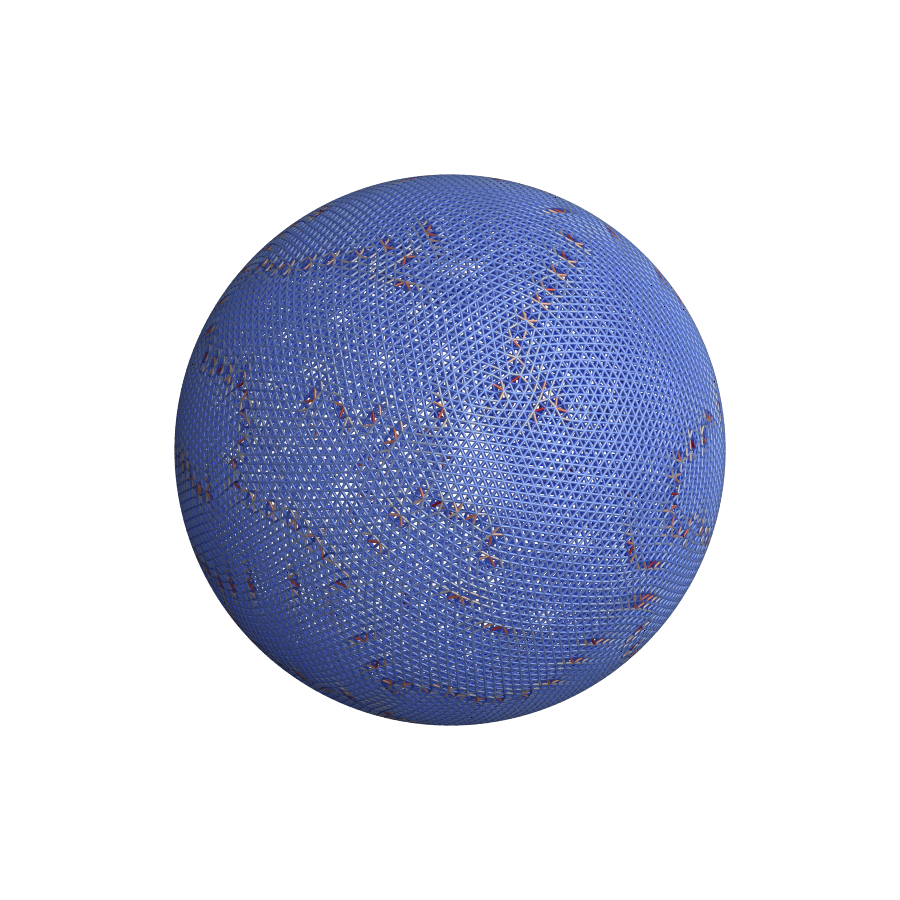

In [8]:
# That new mesh seems much better behaved! 
# Dislocation lines ("scars") still necessarily remain, as imposed by Euler's formula (https://en.wikipedia.org/wiki/Euler_characteristic) 
render.fresnel(snapshot_thomson, outline=0, show_strains=True, cmap='coolwarm').static(height=900, width=900)